In [197]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [198]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-04 13:35:13--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [text/plain]
Saving to: <<adult.data.2>>

adult.data.2        100%[===================>]   3.79M   758KB/s    in 6.5s    

2019-04-04 13:35:20 (599 KB/s) - <<adult.data.2>> saved [3974305/3974305]



In [199]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [200]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [201]:
df = pd.read_csv('adult.data', sep=', ', names=cols)

/Users/aapiskotin/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [202]:
df.shape

(32561, 15)

In [203]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [204]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [205]:
df.groupby('sex').age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [206]:
partition_by_country = df['native-country'].value_counts() / df['native-country'].value_counts().sum()
partition_by_country['United-States']

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

<BarContainer object of 16 artists>

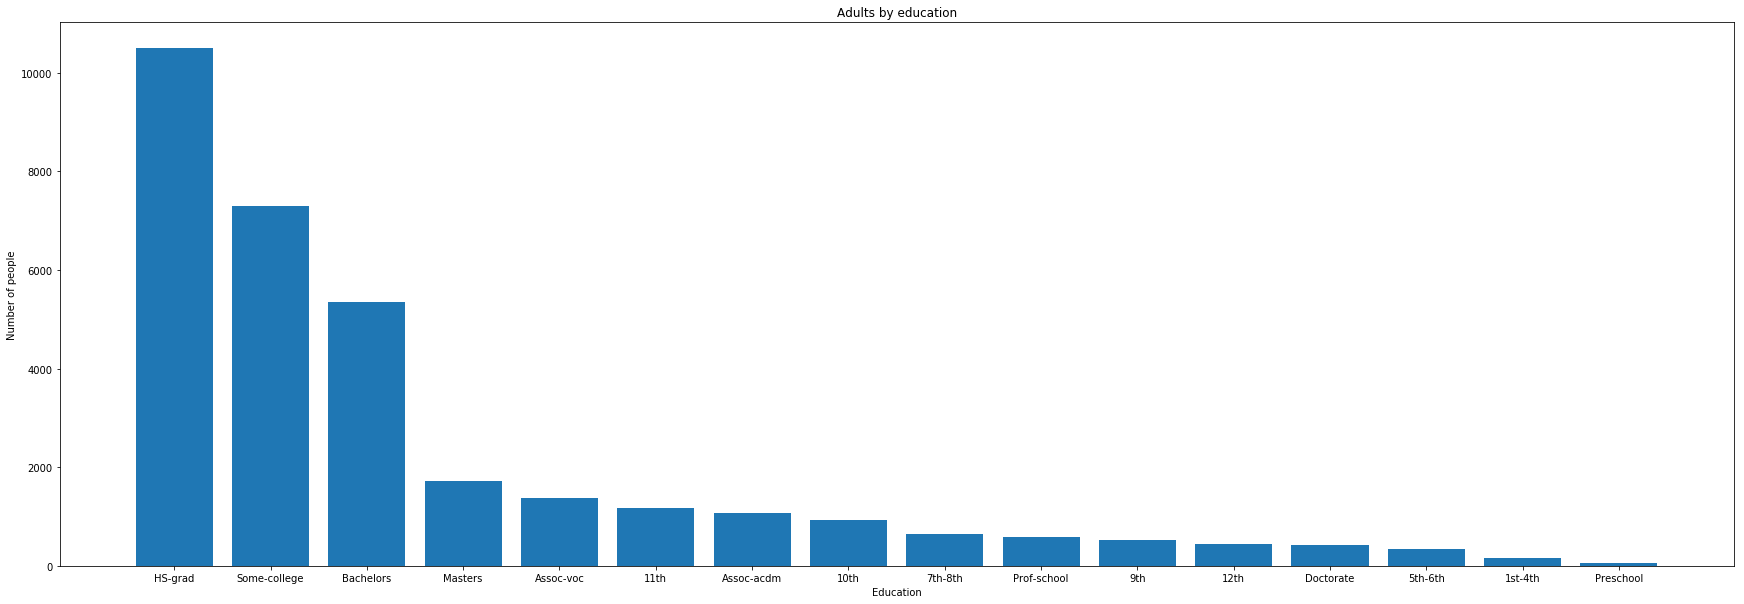

In [207]:
plt.figure(figsize=(30,10))

plt.title('Adults by education')
plt.xlabel('Education')
plt.ylabel('Number of people')

plt.bar(df['education'].value_counts().index, df['education'].value_counts().values)

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [208]:
divorced = df.loc[df['marital-status'] == 'Divorced']
divorced

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
53,50,Federal-gov,251585,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,>50K
54,47,Self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
64,29,Private,105598,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,58,United-States,<=50K
66,28,Private,183175,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [209]:
divorced['fnlwgt'].mean()

185802.79045689848

In [210]:
divorced['fnlwgt'].std()

105646.78945933598

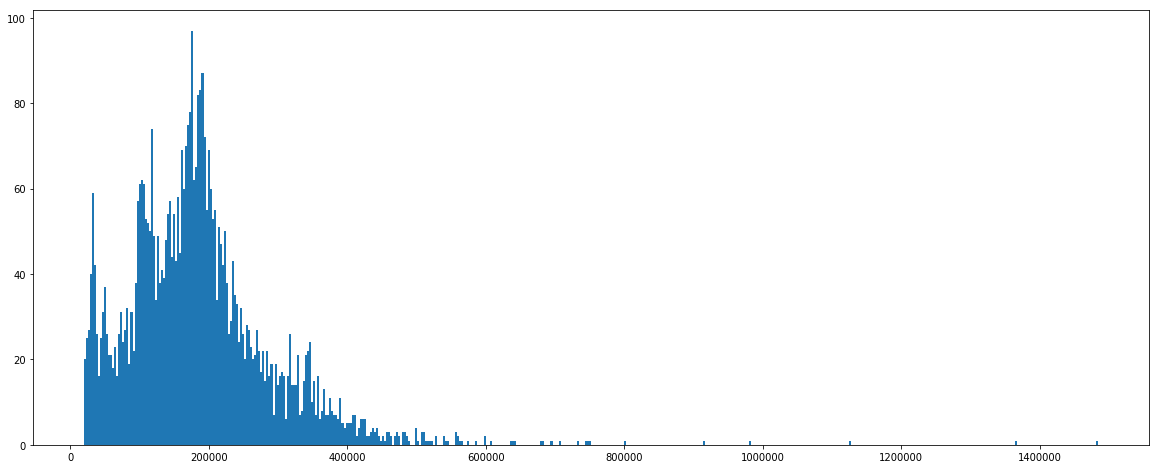

In [211]:
plt.figure(figsize=(20, 8))

plt.hist(divorced['fnlwgt'], bins=500);

> Ответ: оно мне напоминает log-normal

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [212]:
gt50k = df.loc[df['result'] == '>50K']

In [213]:
gt50k

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K


In [214]:
gt50k_counts = gt50k['education'].value_counts()
(gt50k_counts['Bachelors'] + gt50k_counts['Masters'] + gt50k_counts['Doctorate']) / gt50k_counts.sum() > 0.5

False

> Ответ: Ложь

# Сколько в среднем работают люди в неделю в зависимости от education?

In [215]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [216]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

## Ответ: Мужчины

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [217]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [218]:
def in_relations_f(status):
    not_in_relations = ('Not-in-family', 'Unmarried')
    if status in not_in_relations:
        return 'In-relationship'
    else:
        return 'Not-in-relationship'

In [219]:
df.groupby('relationship')['hours-per-week'].mean()

relationship
Husband           44.120139
Not-in-family     40.595665
Other-relative    37.006116
Own-child         33.269337
Unmarried         39.103018
Wife              36.861607
Name: hours-per-week, dtype: float64

In [220]:
df_relations = df['relationship'].apply(in_relations_f)

In [221]:
df1 = df[['hours-per-week', 'relationship']].copy()
df1['relationship'] = df_relations
df1

,hours-per-week,relationship
0,40,In-relationship
1,13,Not-in-relationship
2,40,In-relationship
3,40,Not-in-relationship
4,40,Not-in-relationship
5,40,Not-in-relationship
6,16,In-relationship
7,45,Not-in-relationship
8,50,In-relationship
9,40,Not-in-relationship


In [222]:
df1.groupby('relationship')['hours-per-week'].mean()

relationship
In-relationship        40.157944
Not-in-relationship    40.595291
Name: hours-per-week, dtype: float64

In [223]:
del df1

#### Ответ: Без отношений работают больше

# Из каких стран люди работают farmers/fishers?

In [224]:
df.loc[df['occupation'] == 'Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Philippines        4
Guatemala          4
Cuba               2
El-Salvador        2
Canada             2
Vietnam            2
Italy              2
England            1
Cambodia           1
Ireland            1
Yugoslavia         1
France             1
Japan              1
Germany            1
Poland             1
Hong               1
Portugal           1
Name: native-country, dtype: int64

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [225]:
max_hours = df['hours-per-week'].max()

In [226]:
max_hours

99

In [227]:
df_max_hours = df.loc[df['hours-per-week'] == max_hours]

In [228]:
df_max_hours.shape[0]

85

In [229]:
df_max_hours['result']

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: result, Length: 85, dtype: object

In [230]:
df_max_hours['result'].value_counts()

<=50K    60
>50K     25
Name: result, dtype: int64